### Table of Contents

1. Importing 'final_df' CSV file
2. Changing Data Types After Import
3. Focusing on Top Emerging Markets
4. List of Countries
5. Filtering the 'filtered_df' DataFrame for Macro-economic KPIs
6. Pivoting 'df_reduce' to Determine Relationships
7. Exploratory Visual Analysis
   - Creating a Correlation Matrix Heatmap
   - Creating Mirrored Plots for Strongest Correlations
   - Creating a Pair Plot of the Entire Data Set
8. Defining Possibl Hypotheses


In [1]:
#Importin libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

###  Importing 'final_df' CSV file:

In [3]:
# Specify the file path
file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\World Bank-WDI_Merged.csv'

# Import the DataFrame from the CSV file
final_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
final_df.head()

C:\Users\isaac\AppData\Local\Temp\ipykernel_1380\2939993058.py:5: DtypeWarning: Columns (5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv(file_path)


,Country Name,Country Code,Indicator Name,Indicator Code,Short Name,Currency Unit,Region,Income Group,Lending category,Other groups,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,...,17.401410,17.911234,18.463874,18.924037,19.437054,20.026254,20.647969,21.165877,21.863139,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,...,6.728819,7.005877,7.308571,7.547226,7.875917,8.243018,8.545483,8.906711,9.261320,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,...,38.080931,38.422282,38.722108,38.993157,39.337872,39.695279,40.137847,40.522209,41.011132,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,...,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,...,17.619475,16.500171,24.605861,25.396929,27.037528,29.137914,31.001049,32.777910,33.747907,NaN


### Changing Data Types After Import

In [5]:
# Convert specific columns to strings
final_df.iloc[:, 5:10] = final_df.iloc[:, 5:10].astype(str)

# Display the data types to confirm the changes
print(final_df.dtypes)

# Display the first few rows to verify the content
final_df.head()

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Short Name         object
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
Length: 74, dtype: object


,Country Name,Country Code,Indicator Name,Indicator Code,Short Name,Currency Unit,Region,Income Group,Lending category,Other groups,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Africa Eastern and Southern,nan,nan,nan,nan,nan,...,17.401410,17.911234,18.463874,18.924037,19.437054,20.026254,20.647969,21.165877,21.863139,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,Africa Eastern and Southern,nan,nan,nan,nan,nan,...,6.728819,7.005877,7.308571,7.547226,7.875917,8.243018,8.545483,8.906711,9.261320,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,Africa Eastern and Southern,nan,nan,nan,nan,nan,...,38.080931,38.422282,38.722108,38.993157,39.337872,39.695279,40.137847,40.522209,41.011132,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa Eastern and Southern,nan,nan,nan,nan,nan,...,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,Africa Eastern and Southern,nan,nan,nan,nan,nan,...,17.619475,16.500171,24.605861,25.396929,27.037528,29.137914,31.001049,32.777910,33.747907,NaN


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395808 entries, 0 to 395807
Data columns (total 74 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country Name      395808 non-null  object 
 1   Country Code      395808 non-null  object 
 2   Indicator Name    395808 non-null  object 
 3   Indicator Code    395808 non-null  object 
 4   Short Name        394320 non-null  object 
 5   Currency Unit     395808 non-null  object 
 6   Region            395808 non-null  object 
 7   Income Group      395808 non-null  object 
 8   Lending category  395808 non-null  object 
 9   Other groups      395808 non-null  object 
 10  1960              38945 non-null   float64
 11  1961              43899 non-null   float64
 12  1962              45200 non-null   float64
 13  1963              46136 non-null   float64
 14  1964              46697 non-null   float64
 15  1965              48849 non-null   float64
 16  1966              48

------------------------------------------------------------------------------------------------------------------------------------------------

In [32]:
# Replace 'Korea, Rep.' with 'South Korea' in the 'Country Name' column
final_df['Country Name'] = final_df['Country Name'].replace('Korea, Rep.', 'South Korea')

In [36]:
# Display unique values in the 'Country Name' column that contain "Korea"
print(final_df[final_df['Country Name'].str.contains("Korea", na=False)]['Country Name'].unique())


["Korea, Dem. People's Rep." 'South Korea']


### For the objetives of this analysis, the focus will be in the nowadays *Top Emerging Markets*

Emerging markets represent dynamic economies that collectively account for 31% of the world's nominal GDP. Here’s a brief overview of the ten largest emerging markets:

• **China:** The second-largest economy globally, projected to grow from 3% in 2022 to 5.2% in 2023. GDP expected to reach 19.37 trillion in 2023 and $27.5 trillion by 2028.

• **India:** Strong fundamentals with a GDP of 3.76 trillion in 2023, expected to grow to 5.57 trillion by 2028. Forecasted GDP of $26 trillion by 2047.

• **Brazil:** The largest economy in Latin America, with a 2023 GDP of 2.08 trillion, projected to rise to $2.75 trillion by 2028.

• **South Korea:** A technological hub with a 2023 GDP of 1.72 trillion, expected to reach $2.12 trillion by 2028.

• **Mexico:** The 14th largest economy, with a GDP of 1.67 trillion in 2023, expected to grow to $2 trillion by 2028.

• **Indonesia:** The largest economy in Southeast Asia, projected GDP of 1.39 trillion in 2023, expected to hit $2 trillion by 2028.

• **Saudi Arabia:** Major oil producer with a GDP estimate of 1.06 trillion in 2023, projected to reach $1.25 trillion by 2028.

• **Turkey:** Expected to enter the trillion-dollar economy club in 2023 with a GDP of 1.02 trillion, projected to grow to $1.33 trillion by 2028.

• **Poland:** A resilient economy in Europe, with a projected GDP of $748.88 billion in 2023, expected to join the trillion-dollar economy club by 2028.

These emerging markets showcase diverse opportunities and challenges, driven by factors like infrastructure investment, commodity prices, and economic reforms.
*Disclaimer: The author (Nasdaq Index) has no position in any stocks mentioned. Investors should consider the above information not as a de facto recommendation, but as an idea for further consideration. GDP data on World Bank and IMF WEO April 2023.*

### List of Countries:

In [10]:
# List of countries to filter
countries_to_keep = [
    'China',
    'India',
    'Brazil',
    'South Korea',
    'Mexico',
    'Indonesia',
    'Saudi Arabia',
    'Turkey',
    'Poland'
]

# Filter the DataFrame to keep only the specified countries
filtered_df = final_df[final_df['Country Name'].isin(countries_to_keep)]

# Display the filtered DataFrame
print(filtered_df)

       Country Name Country Code  \
111600       Brazil          BRA   
111601       Brazil          BRA   
111602       Brazil          BRA   
111603       Brazil          BRA   
111604       Brazil          BRA   
...             ...          ...   
369019       Turkey          TUR   
369020       Turkey          TUR   
369021       Turkey          TUR   
369022       Turkey          TUR   
369023       Turkey          TUR   

                                           Indicator Name     Indicator Code  \
111600  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
111601  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   
111602  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   
111603            Access to electricity (% of population)     EG.ELC.ACCS.ZS   
111604  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   
...                                                   ...                ...   
369019 

In [11]:
# Display all column names in the DataFrame
print(filtered_df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Short Name', 'Currency Unit', 'Region', 'Income Group',
       'Lending category', 'Other groups', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


### Filtering the 'filtered_df' DataFrame for the Specified Macro-economic KPIs

By analyzing these indicators, a company can gauge the risks and opportunities in emerging markets and make informed decisions about where and how to invest.

In [13]:
# Define the list of Indicator Codes to filter
indicator_codes = [
    "NY.GDP.MKTP.CD",     # GDP (current US$)
    "NY.GDP.MKTP.KD.ZG",  # GDP growth (annual %)
    "NE.CON.TOTL.KD.ZG",  # Final consumption expenditure (annual % growth)
    "NE.GDI.TOTL.KD.ZG",  # Gross capital formation (annual % growth)
    "NE.EXP.GNFS.KD.ZG",  # Exports of goods and services (annual % growth)
    "NE.IMP.GNFS.KD.ZG",  # Imports of goods and services (annual % growth)
    "NY.GNS.ICTR.ZS",     # Gross savings (% of GDP)
    "BX.KLT.DINV.WD.GD.ZS",  # Foreign direct investment, net inflows (% of GDP)
    "FP.CPI.TOTL",        # Consumer price index (Proxy for Inflation Rate)
    "SL.UEM.TOTL.ZS"      # Unemployment, total (% of total labor force)
]

# Create a new filtered DataFrame
filtered_macro_economic_kpis = filtered_df[filtered_df['Indicator Code'].isin(indicator_codes)]

# Using Jupyter's display function (if using a Jupyter Notebook)
from IPython.display import display
display(filtered_macro_economic_kpis)

,Country Name,Country Code,Indicator Name,Indicator Code,Short Name,Currency Unit,Region,Income Group,Lending category,Other groups,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
111826,Brazil,BRA,Consumer price index (2010 = 100),FP.CPI.TOTL,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,nan,...,1.269272e+02,1.383886e+02,1.504826e+02,1.556688e+02,1.613738e+02,1.673979e+02,1.727743e+02,1.871174e+02,2.044821e+02,2.138751e+02
112001,Brazil,BRA,Exports of goods and services (annual % growth),NE.EXP.GNFS.KD.ZG,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,nan,...,-1.569680e+00,6.819564e+00,8.631256e-01,4.908793e+00,4.053084e+00,-2.561421e+00,-2.290906e+00,4.382257e+00,5.742840e+00,1.023139e+00
112030,Brazil,BRA,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,nan,...,1.913467e+00,-2.801311e+00,-2.881157e+00,1.340161e+00,1.989841e+00,1.869906e+00,-4.358738e+00,3.251385e+00,3.659589e+00,2.794976e+00
112060,Brazil,BRA,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,nan,...,3.571353e+00,3.592149e+00,4.137378e+00,3.338260e+00,4.078588e+00,3.692673e+00,2.592638e+00,2.779791e+00,3.822196e+00,2.954793e+00
112073,Brazil,BRA,GDP (current US$),NY.GDP.MKTP.CD,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,nan,...,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.873288e+12,1.476107e+12,1.670647e+12,1.951924e+12,2.173666e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368012,Turkey,TUR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Türkiye,New Turkish lira,Europe & Central Asia,Upper middle income,IBRD,nan,...,4.939715e+00,6.084487e+00,3.323084e+00,7.501997e+00,3.013180e+00,8.185259e-01,1.859840e+00,1.143938e+01,5.533469e+00,4.516867e+00
368069,Turkey,TUR,Gross capital formation (annual % growth),NE.GDI.TOTL.KD.ZG,Türkiye,New Turkish lira,Europe & Central Asia,Upper middle income,IBRD,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368095,Turkey,TUR,Gross savings (% of GDP),NY.GNS.ICTR.ZS,Türkiye,New Turkish lira,Europe & Central Asia,Upper middle income,IBRD,nan,...,2.489995e+01,2.521442e+01,2.498191e+01,2.605687e+01,2.798793e+01,2.639131e+01,2.707329e+01,3.062239e+01,3.002975e+01,2.602099e+01
368142,Turkey,TUR,Imports of goods and services (annual % growth),NE.IMP.GNFS.KD.ZG,Türkiye,New Turkish lira,Europe & Central Asia,Upper middle income,IBRD,nan,...,2.993149e-01,6.624008e-01,2.995931e+00,1.063508e+01,-6.172329e+00,-5.011971e+00,6.774327e+00,1.652617e+00,8.567891e+00,1.171975e+01


In [14]:
# Assign to a simpler variable name
df = filtered_macro_economic_kpis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 111826 to 368976
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      80 non-null     object 
 1   Country Code      80 non-null     object 
 2   Indicator Name    80 non-null     object 
 3   Indicator Code    80 non-null     object 
 4   Short Name        80 non-null     object 
 5   Currency Unit     80 non-null     object 
 6   Region            80 non-null     object 
 7   Income Group      80 non-null     object 
 8   Lending category  80 non-null     object 
 9   Other groups      80 non-null     object 
 10  1960              9 non-null      float64
 11  1961              31 non-null     float64
 12  1962              31 non-null     float64
 13  1963              32 non-null     float64
 14  1964              32 non-null     float64
 15  1965              32 non-null     float64
 16  1966              32 non-null     float64


### Exporting 'df' 

In [40]:
#Specify the output file path
file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\WDICountries-Final.csv'


# Export the DataFrame to a CSV file
df.to_csv(file_path, index=False)

# Confirmation message
print(f"DataFrame exported to {file_path}")

DataFrame exported to C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\WDICountries-Final.csv


### Importing 'df'

In [89]:
# Specify the file path
file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\WDICountries-Final.csv'

# Import the DataFrame from the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Short Name,Currency Unit,Region,Income Group,Lending category,Other groups,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,BRA,Consumer price index (2010 = 100),FP.CPI.TOTL,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,1.269272e+02,1.383886e+02,1.504826e+02,1.556688e+02,1.613738e+02,1.673979e+02,1.727743e+02,1.871174e+02,2.044821e+02,2.138751e+02
1,Brazil,BRA,Exports of goods and services (annual % growth),NE.EXP.GNFS.KD.ZG,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,-1.569680e+00,6.819564e+00,8.631256e-01,4.908793e+00,4.053084e+00,-2.561421e+00,-2.290906e+00,4.382257e+00,5.742840e+00,1.023139e+00
2,Brazil,BRA,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,1.913467e+00,-2.801311e+00,-2.881157e+00,1.340161e+00,1.989841e+00,1.869906e+00,-4.358738e+00,3.251385e+00,3.659589e+00,2.794976e+00
3,Brazil,BRA,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,3.571353e+00,3.592149e+00,4.137378e+00,3.338260e+00,4.078588e+00,3.692673e+00,2.592638e+00,2.779791e+00,3.822196e+00,2.954793e+00
4,Brazil,BRA,GDP (current US$),NY.GDP.MKTP.CD,Brazil,Brazilian real,Latin America & Caribbean,Upper middle income,IBRD,NaN,...,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.873288e+12,1.476107e+12,1.670647e+12,1.951924e+12,2.173666e+12


### The analysis focuses on the past two decades to specifically assess the economic recovery from critical events, including the 2000 ".com" market crash, the 2008 global financial crisis, and the 2020 COVID-19 pandemic-induced recession. By narrowing the timeframe, we aim to evaluate how different countries responded and recovered from these significant economic disruptions.

In [99]:
# List of columns to keep, including the necessary metadata and years from 2003 to 2023
columns_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 
                   'Short Name', 'Currency Unit', 'Region', 'Income Group', 
                   'Lending category', 'Other groups'] + [str(year) for year in range(2003, 2024)]

# Selecting the relevant columns
df_reduced = df[columns_to_keep]

# Check the structure of the reduced DataFrame
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      80 non-null     object 
 1   Country Code      80 non-null     object 
 2   Indicator Name    80 non-null     object 
 3   Indicator Code    80 non-null     object 
 4   Short Name        80 non-null     object 
 5   Currency Unit     80 non-null     object 
 6   Region            80 non-null     object 
 7   Income Group      80 non-null     object 
 8   Lending category  70 non-null     object 
 9   Other groups      0 non-null      float64
 10  2003              76 non-null     float64
 11  2004              76 non-null     float64
 12  2005              76 non-null     float64
 13  2006              76 non-null     float64
 14  2007              76 non-null     float64
 15  2008              76 non-null     float64
 16  2009              76 non-null     float64
 17 

### Pivoting 'df_reduce' in order to determine the relationship between the variables.

In [113]:
# Melting the reduced dataframe
df_melted_reduced = df_reduced.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 
             'Short Name', 'Currency Unit', 'Region', 'Income Group', 'Lending category', 'Other groups'],
    var_name='Year',
    value_name='Value'
)

# Convert the 'Year' column to numeric, in case it is treated as an object
df_melted_reduced['Year'] = pd.to_numeric(df_melted_reduced['Year'], errors='coerce')

# Filtering the melted dataframe to keep only the relevant indicators and countries
df_filtered_reduced = df_melted_reduced[
    (df_melted_reduced['Indicator Code'].isin(indicator_codes)) &
    (df_melted_reduced['Country Name'].isin(countries_to_keep))
]

# Now, pivot the table so that each indicator becomes a separate column
df_pivoted_reduced = df_filtered_reduced.pivot_table(
    index=['Country Name', 'Country Code', 'Year'],
    columns='Indicator Code',
    values='Value'
).reset_index()

# DataFrame where each metric (Indicator Code) is a column

In [115]:
df_ = df_pivoted_reduced

In [121]:
df_.head()

Indicator Code,Country Name,Country Code,Year,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,NE.CON.TOTL.KD.ZG,NE.EXP.GNFS.KD.ZG,NE.GDI.TOTL.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GNS.ICTR.ZS,SL.UEM.TOTL.ZS
0,Brazil,BRA,2003,1.813401,69.824196,-0.026542,11.015939,-2.692671,-0.483497,5.582337e+11,1.140829,16.417942,11.169
1,Brazil,BRA,2004,2.713532,74.430628,3.912306,14.473780,10.322010,10.364045,6.692894e+11,5.759965,18.855019,10.072
2,Brazil,BRA,2005,1.733894,79.543667,3.855949,9.644190,-2.497390,7.461346,8.916338e+11,3.202132,18.114096,10.551
3,Brazil,BRA,2006,1.753126,82.871431,4.874538,4.837428,8.474882,17.762585,1.107627e+12,3.961989,18.409816,9.692
4,Brazil,BRA,2007,3.190826,85.889006,5.823590,6.176102,15.915422,19.557599,1.397114e+12,6.069871,19.346360,9.280


### Exporting 'df_'

In [123]:
# Define the file path and file name
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\WDI-pivoted-&-reduced.csv'

# Export the DataFrame to a CSV file
df_pivoted_reduced.to_csv(output_path, index=False)

In [132]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          168 non-null    object 
 1   Country Code          168 non-null    object 
 2   Year                  168 non-null    int64  
 3   BX.KLT.DINV.WD.GD.ZS  168 non-null    float64
 4   FP.CPI.TOTL           168 non-null    float64
 5   NE.CON.TOTL.KD.ZG     168 non-null    float64
 6   NE.EXP.GNFS.KD.ZG     147 non-null    float64
 7   NE.GDI.TOTL.KD.ZG     126 non-null    float64
 8   NE.IMP.GNFS.KD.ZG     147 non-null    float64
 9   NY.GDP.MKTP.CD        168 non-null    float64
 10  NY.GDP.MKTP.KD.ZG     168 non-null    float64
 11  NY.GNS.ICTR.ZS        167 non-null    float64
 12  SL.UEM.TOTL.ZS        168 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 17.2+ KB


--------------------------------------------------------------------------------------------------------------------------------------------------------

### Creating Charts for Exploratory Analysis
 Suitable variables for the exploratory visual analysis are  'Country Code', **'Indicator Code'**, and 'Region'

### Creating a Correlation Matrix Heatmap Indicator Codes (KIPs)

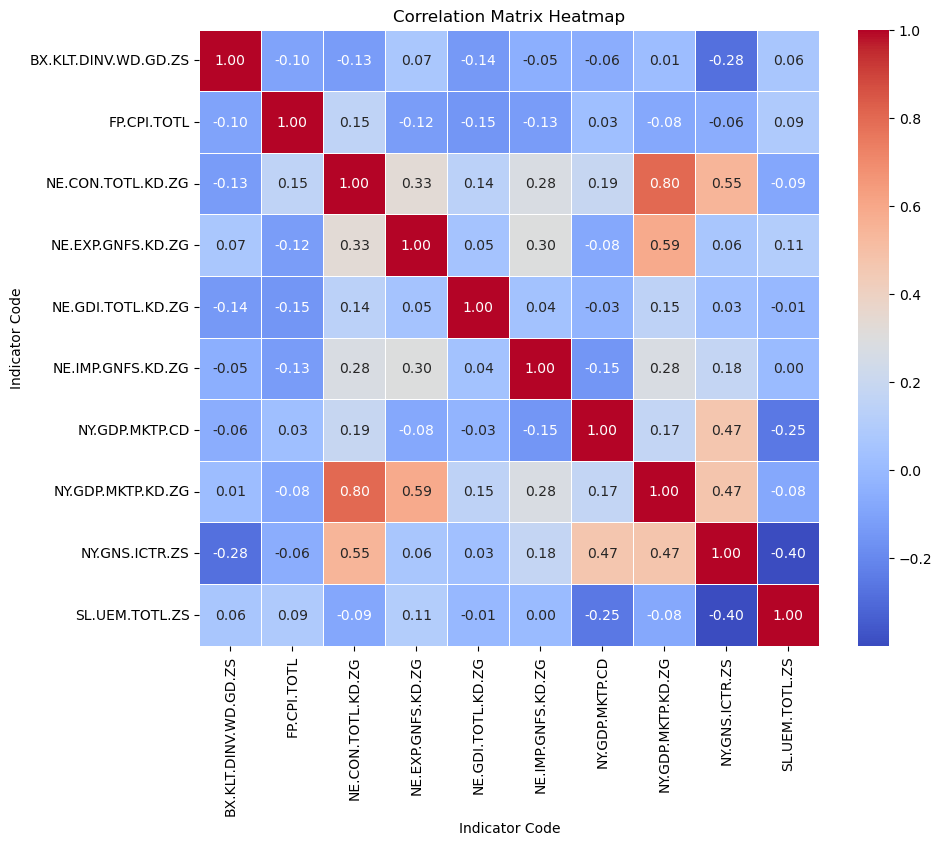

In [134]:
# Creating the correlation matrix
correlation_matrix = df_.iloc[:, 3:].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

# Save the chart
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Viz'
plt.savefig(f'{output_path}/correlation_matrix_heatmap.png')

# Display the chart
plt.show()

**Indicator Names:**

1. `NY.GDP.MKTP.CD` - GDP (current US$)
2. `NY.GDP.MKTP.KD.ZG` - GDP growth (annual %)
3. `NE.CON.TOTL.KD.ZG` - Final consumption expenditure (annual % growth)
4. `NE.GDI.TOTL.KD.ZG` - Gross capital formation (annual % growth)
5. `NE.EXP.GNFS.KD.ZG` - Exports of goods and services (annual % growth)
6. `NE.IMP.GNFS.KD.ZG` - Imports of goods and services (annual % growth)
7. `NY.GNS.ICTR.ZS` - Gross savings (% of GDP)
8. `BX.KLT.DINV.WD.GD.ZS` - Foreign direct investment, net inflows (% of GDP)
9. `FP.CPI.TOTL` - Consumer price index (Proxy for Inflation Rate)
10. `SL.UEM.TOTL.ZS` - Unemployment, total (% of total labor force)

### Relationships between the variables:


**Strong Positive Correlation**:
- *Consumption Growth* and *GDP Growth* (0.80) - (*NE.CON.TOTL.KD.ZG* and *NY.GDP.MKTP.KD.ZG*), meaning as GDP grows, consumption increases.
- *Savings* and *Consumption Growth* (0.55) - (*NY.GNS.ICTR.ZS* and *NE.CON.TOTL.KD.ZG*), showing a link between higher consumption and savings.

**Negative Correlation**:
- *Unemployment* and *Savings* (-0.40) - (*SL.UEM.TOTL.ZS* and *NY.GNS.ICTR.ZS*), meaning higher unemployment leads to lower savings.
- *Unemployment* and *GDP Growth* (-0.08) - (*SL.UEM.TOTL.ZS* and *NY.GDP.MKTP.KD.ZG*), suggesting a weak inverse relationship.

**Weak Correlations**:
- *FDI Inflows* and *Imports* (-0.05) - (*BX.KLT.DINV.WD.GD.ZS* and *NE.IMP.GNFS.KD.ZG*), showing little relationship.
- *GDP* and *FDI Inflows* (-0.06) - (*NY.GDP.MKTP.CD* and *BX.KLT.DINV.WD.GD.ZS*), indicating no significant linearch relationship.ic indicators.

### Creating Scatterplots Charts for the Variables (KPIs) with the Strongest Correlations:

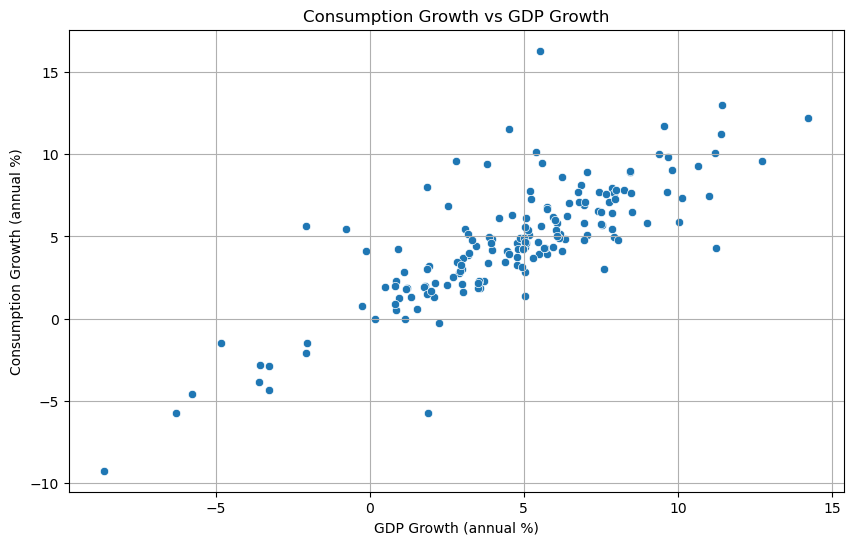

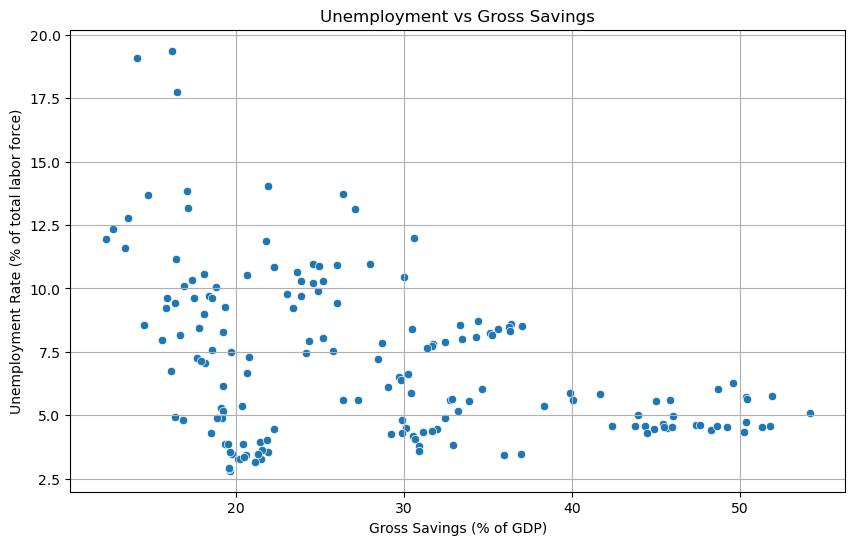

In [142]:
# Strongest Positive Correlation: NE.CON.TOTL.KD.ZG (Consumption Growth) vs NY.GDP.MKTP.KD.ZG (GDP Growth)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NY.GDP.MKTP.KD.ZG', y='NE.CON.TOTL.KD.ZG', data=df_)
plt.title('Consumption Growth vs GDP Growth')
plt.xlabel('GDP Growth (annual %)')
plt.ylabel('Consumption Growth (annual %)')
plt.grid(True)
plt.savefig(f'{output_path}/consumption_vs_gdp.png')
plt.show()

# Strong Negative Correlation: SL.UEM.TOTL.ZS (Unemployment) vs NY.GNS.ICTR.ZS (Gross Savings)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NY.GNS.ICTR.ZS', y='SL.UEM.TOTL.ZS', data=df_)
plt.title('Unemployment vs Gross Savings')
plt.xlabel('Gross Savings (% of GDP)')
plt.ylabel('Unemployment Rate (% of total labor force)')
plt.grid(True)
plt.savefig(f'{output_path}/unemployment_vs_savings.png')
plt.show()

**Output Analysis:**

1. **Consumption Growth vs GDP Growth**:
    - The scatterplot indicates a strong positive linear relationship between *Consumption Growth* and *GDP Growth*. As GDP growth increases, consumption growth follows a similar upward trend.
    - The clustering of points suggests a consistent pattern where higher GDP growth is associated with higher consumption, highlighting that as the economy expands, consumer spending tends to rise proportionally.

2. **Unemployment vs Gross Savings**:
    - The scatterplot shows a negative correlation between *Unemployment* and *Gross Savings*. As the unemployment rate rises, gross savings as a percentage of GDP generally decreases.
    - The spread of data points at higher savings rates suggests that countries with higher savings tend to maintain lower unemployment rates, supporting the inverse relationship between these two inddicators.
dicators.
hem.

### Creating a Pair Plot of the Entire Data Set

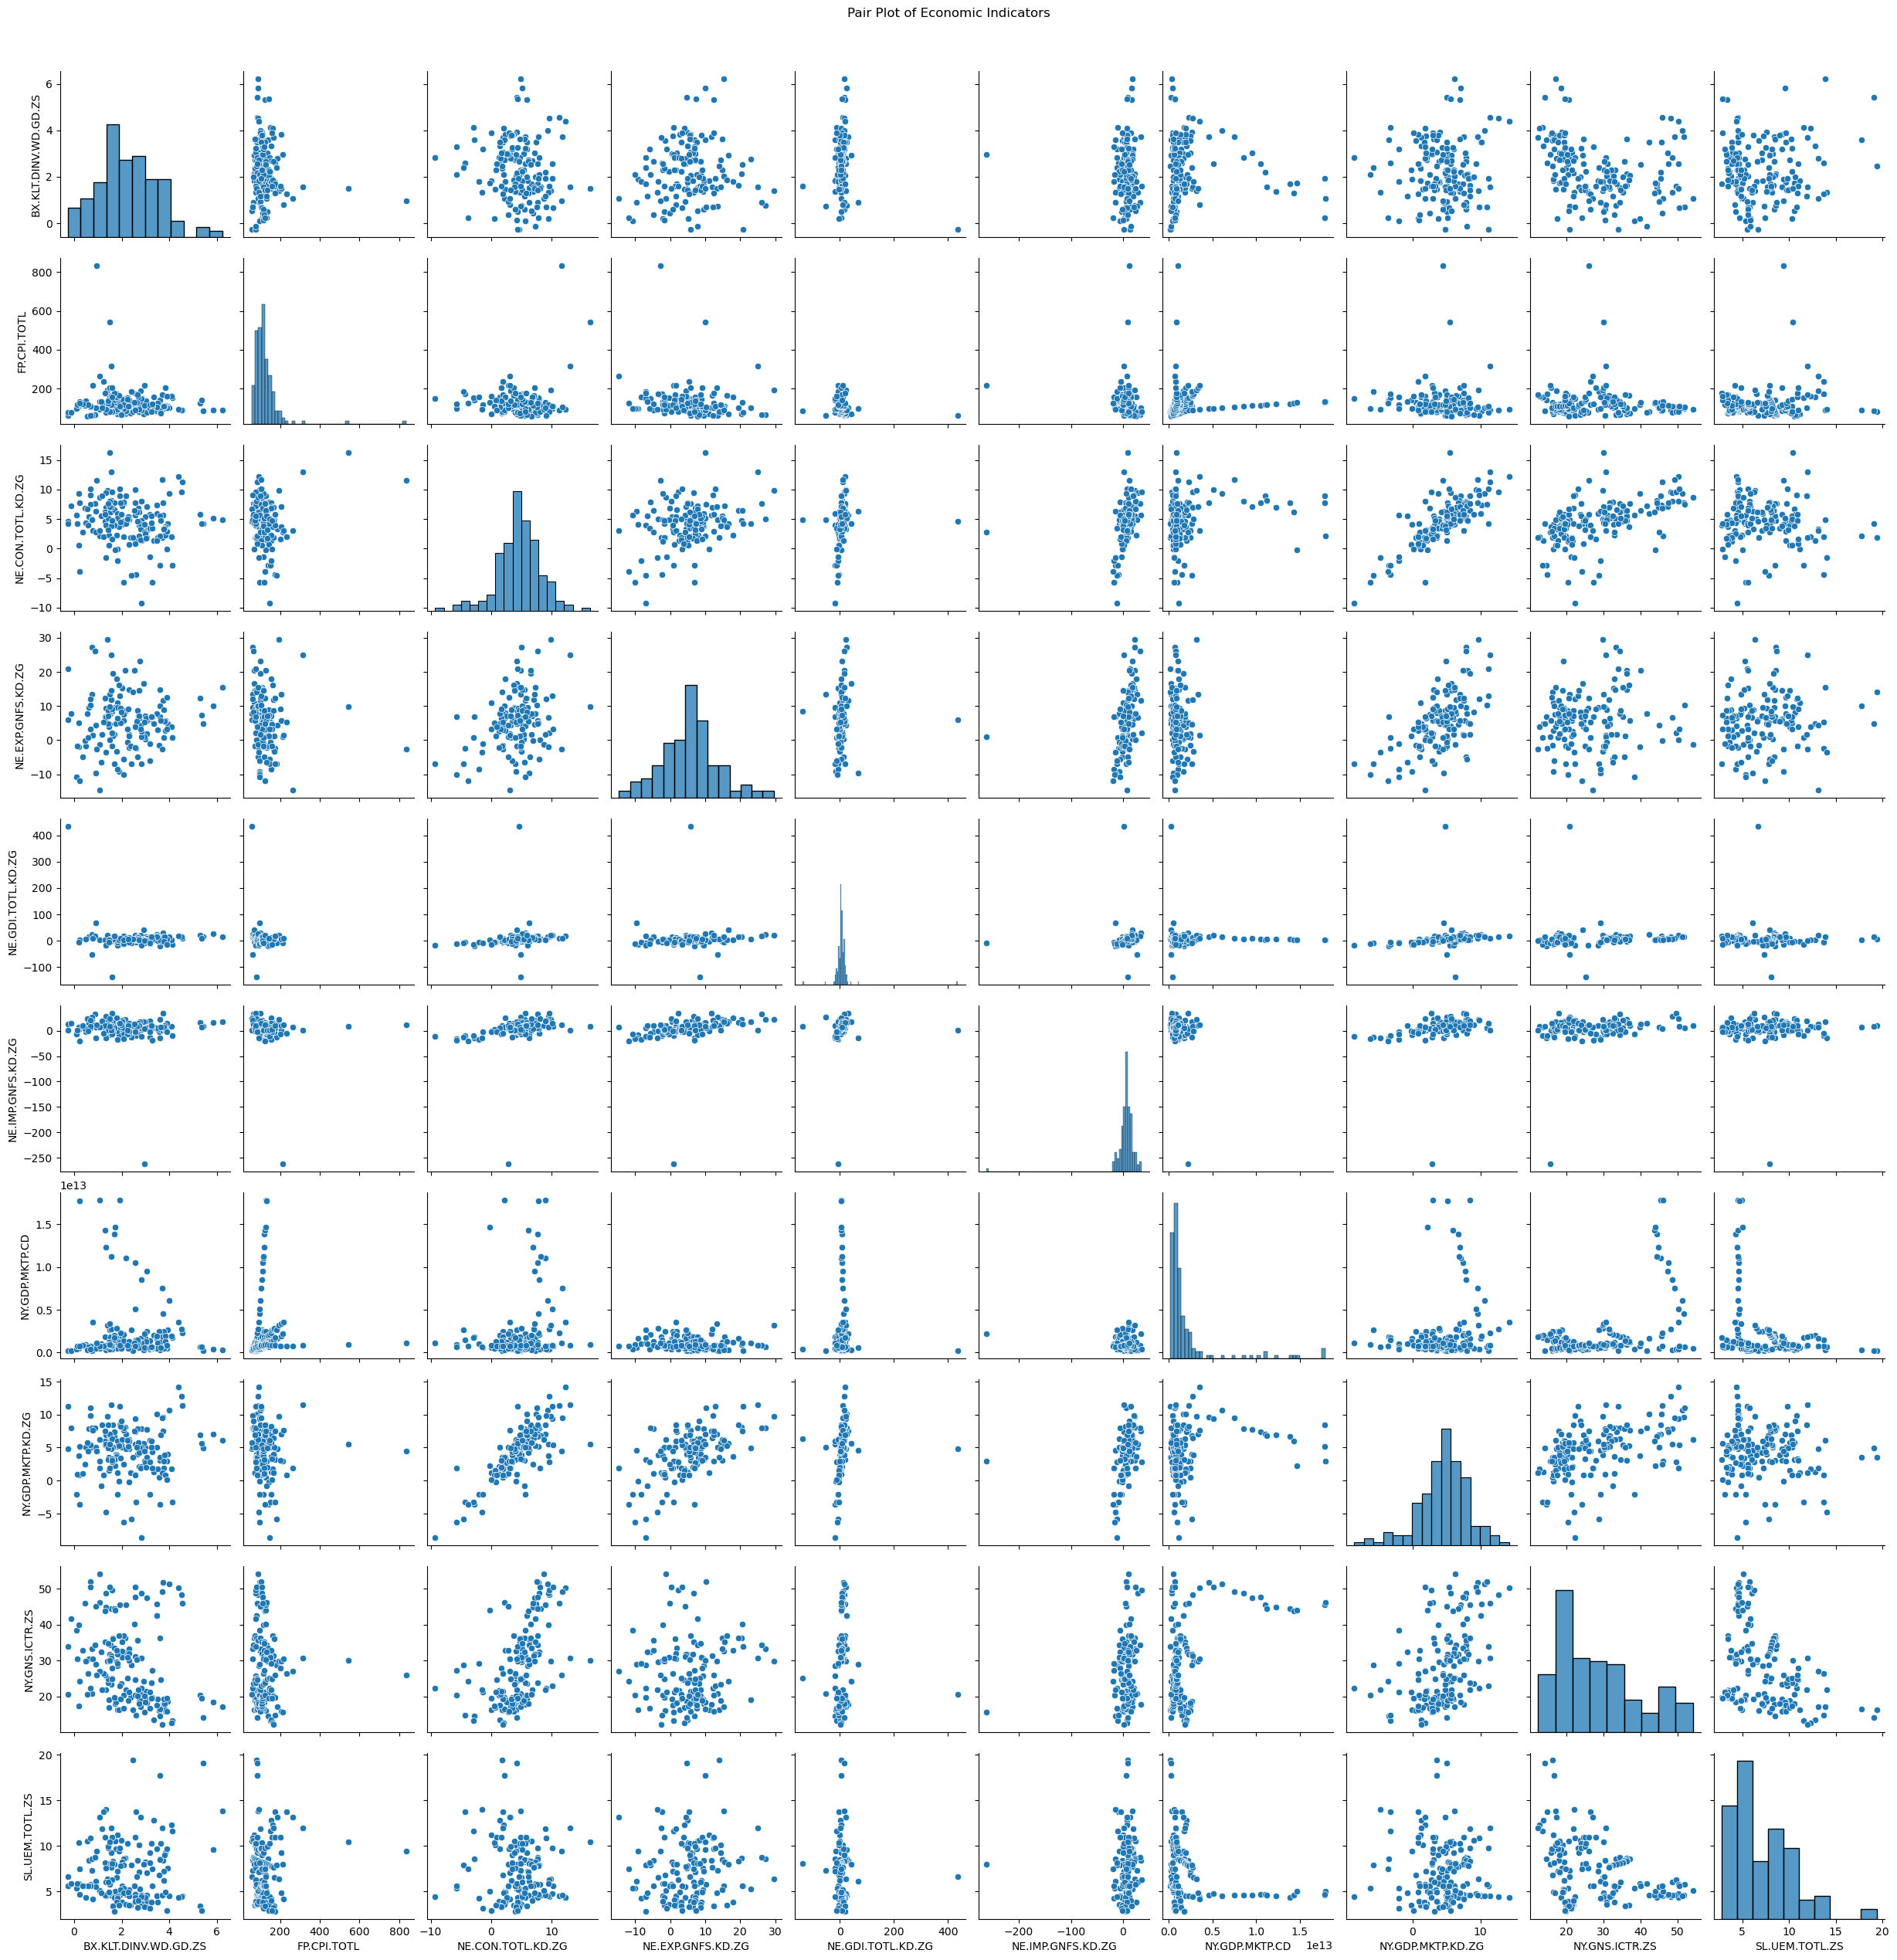

In [153]:
# Create a pair plot of the entire data set
sns.pairplot(df_.iloc[:, 3:])  # Pair plot for all numerical columns starting from the 4th column
plt.suptitle('Pair Plot of Economic Indicators', y=1.02)
plt.savefig(f'{output_path}/pair_plot_entire_data.png')
plt.show()

### Pair Plot Analysis:
The pair plot shows the relationships between different economic indicators in the dataset. Key observations include:

1. **Unemployment (`SL.UEM.TOTL.ZS`)**: It shows a right-skewed distribution, with most countries having lower unemployment. Further exploration can reveal which factors influence employment trends.
   
2. **Foreign Direct Investment (`BX.KLT.DINV.WD.GD.ZS`)**: The distribution is widely spread with clear outliers. Understanding the factors driving FDI could provide insights into economic growth and stability.
   
3. **GDP Growth (`NY.GDP.MKTP.KD.ZG`)**: There are clusters and a few outliers, indicating varying growth rates. This variable is crucial to understanding economic health and its interaction with other indicators like savings and consumption.

These three variables are interesting to explore further due to their potential impact on broader economic peformance.
terns.

### Creating a Categorical Plot and Interpreting the Results:

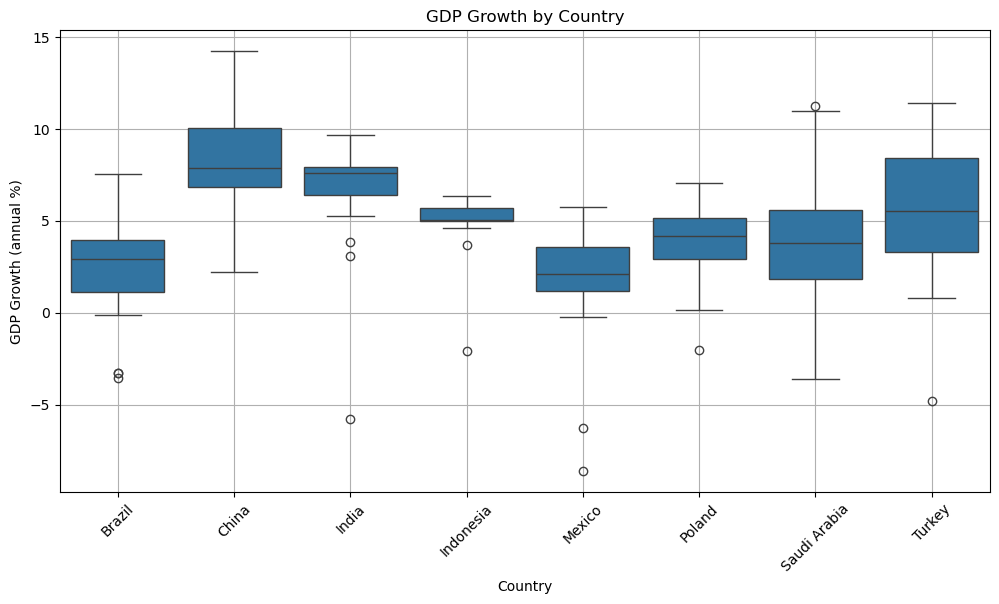

In [157]:
# Creating a categorical plot for GDP Growth by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country Name', y='NY.GDP.MKTP.KD.ZG', data=df_)
plt.title('GDP Growth by Country')
plt.xticks(rotation=45)
plt.ylabel('GDP Growth (annual %)')
plt.xlabel('Country')
plt.grid(True)

# Saving the plot
plt.savefig(f'{output_path}/gdp_growth_by_country.png')

# Displaying the plot
plt.show()

### Plot Interpretation:

The boxplot illustrates the distribution of GDP growth rates across various countries. Key observations:

- **China** exhibits the highest median GDP growth, with a relatively tight distribution, indicating consistent high growth. The lack of significant outliers reflects economic stability.
- **India** shows a high median GDP growth but with more variability and some negative outliers, suggesting occasional economic challenges.
- **Brazil** and **Mexico** have lower median GDP growth rates, with Brazil showing a few negative outliers, pointing to periods of economic contraction.
- **Turkey** and **Saudi Arabia** also demonstrate relatively high GDP growth, with Turkey showing more variation and occasional downturns.

This plot provides a comparison of economic performance across countries, highlighting growth consistency and volatility.

--------------------------------------------------------------------------------------------------------------------------------------------------

###  Answers to the questions based on the visual exploration conducted:


### 1. How do GDP growth and gross savings reflect potential demand for banking services?
- Countries with higher GDP growth (e.g., China, Turkey) also have higher savings rates, indicating strong demand for banking services, particularly savings and investment products.

### 2. What impact do inflation (CPI) and unemployment rates have on financial service usage?
- Higher unemployment correlates with lower savings (e.g., Brazil), suggesting reduced financial service usage. Inflation impact still requires exploration.

### 3. How do FDI inflows indicate the attractiveness of the financial sector in emerging markets?
- High FDI inflows (e.g., India, China) suggest that these countries' financial sectors are attractive to investors, offering expansion opportunities.

### 4. Is GDP growth driving demand for consumer banking products?
- High GDP growth in countries like China likely drives demand for consumer banking products, especially with rising disposable income.

### 5. What proportion of gross savings is held in banks?
- Countries with high savings rates (e.g., China) likely hold more savings in banks, signaling opportunities for expanding banking services.

### 6. How are banks responding to GDP growth and savings rate changes?
- In high-growth countries, banks likely expand savings and investment products. In volatile markets (e.g., Brazil), banks may focus on more ws in emerging markets?alizations.

### New Questions Raised:
1. What sectors drive GDP growth and influence financial product demand?
2. How does inflation affect real savings in high-growth countries?
3. How do global interest rates affect FDI inflows in emerging markets?

--------------------------------------------------------------------------------------------------------------------------------------------------

### Defining possible hypotheses:


1. **Hypothesis 1**: 
   *If* a country's GDP growth increases, *then* consumption growth will also increase, following a strong positive correlation between these two indicators.s.

2. **Hypothesis 2**: 
*If* GDP growth increases in a country, *then* gross savings as a percentage of GDP will also increase, indicating a higher demand for savings and investment products.hips.

In [164]:
# Define the export path
export_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\df__final.csv'

# Export the DataFrame
df_.to_csv(export_path, index=False)